In [388]:
import pandas as pd
from os import listdir
from os.path import isfile, join

#### Mergering 12 months of sales data into a single one####

In [413]:
file_path = './Sales_Data'
onlyfiles = [f for f in listdir(file_path) if isfile(join(file_path, f))]

In [414]:
df = pd.DataFrame()
for i in onlyfiles:
    df = pd.concat([pd.read_csv("./Sales_Data/" + i), df])
df.to_csv('all_data.csv', index=False)

### Read in from new created all_data file###

In [216]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


### Q1: What's the best month for sales? How much was earned on that month? ###

In [217]:
# Extract month data from order date
# all_data['Month'] = all_data['Order Date'].str.split('/', expand=True)[0]
# Alternative of that
all_data['Month'] = all_data['Order Date'].str[0:2]
na = all_data[all_data.isna().any(axis=1)]

all_data.dropna(how='all', inplace=True)
all_data = all_data[all_data['Month'].str[0:2] != 'Or']

In [218]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float')
all_data['Price Each'] = all_data['Price Each'].astype('float')
# all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
# all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data['Total'] = all_data['Price Each'] * all_data['Quantity Ordered']

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
best_month = all_data.groupby(['Month']).sum()
best_month.sort_values('Total', ascending=False)

# Best_Selling_Month = 'December'
# Total_Selling = 4613443.340

,Quantity Ordered,Price Each,Total
Month,,,
12,28114.000,4588415.410,4613443.340
10,22703.000,3715554.830,3736726.880
4,20558.000,3367671.020,3390670.240
11,19798.000,3180600.680,3199603.200
5,18667.000,3135125.130,3152606.750
3,17005.000,2791207.830,2807100.380
7,16072.000,2632539.560,2647775.760
6,15253.000,2562025.610,2577802.260
8,13448.000,2230345.420,2244467.880


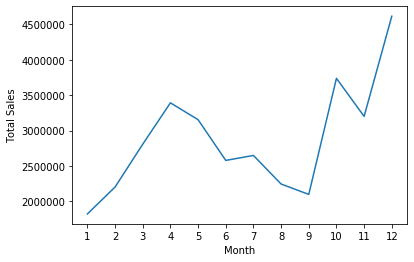

In [219]:
import matplotlib.pyplot as plt

plt.plot(best_month['Total'])
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

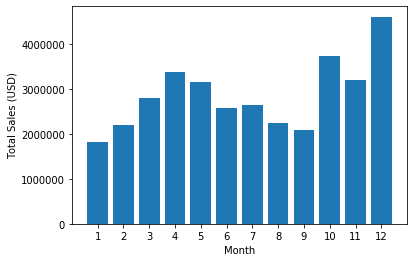

In [220]:
plt.bar(range(1, 13), best_month['Total'])
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel("Total Sales (USD)")
plt.show()

##### Seems like December has the biggest sale and it makes sense given the holidays people are buying gifts for each other #####

### Q2: What city had the highest sales? ###

#### 1. Split the address column to extract city information first###

In [276]:
# all_data['city'] = all_data['Purchase Address'].str.split(',', expand=True)[1]
# all_data.head()

# Alternative method to get city using apply():
def get_city(address):
    temp_address = address.split(',')
    city = temp_address[1].strip()
    state = temp_address[2].split()[0]
    return "{}, {}".format(city, state)

all_data['city'] = all_data['Purchase Address'].apply(lambda x: get_city(x))

#### 2. Group by the city and find the city that had highest sales ####

In [273]:
best_city = all_data.groupby(['city']).sum()
best_city

,Quantity Ordered,Price Each,Month,Total
city,,,,
"Atlanta, GA",16602.000,2779908.200,104794,2795498.580
"Austin, TX",11153.000,1809873.610,69829,1819581.750
"Boston, MA",22528.000,3637409.770,141112,3661642.010
"Dallas, TX",16730.000,2752627.820,104620,2767975.400
"Los Angeles, CA",33289.000,5421435.230,208325,5452570.800
"New York City, NY",27932.000,4635370.830,175741,4664317.430
"Portland, ME",2750.000,447189.250,17144,449758.270
"Portland, OR",11303.000,1860558.220,70621,1870732.340
"San Francisco, CA",50239.000,8211461.740,315520,8262203.910


#### 3. Making graph of the city (3 different ways to result same result) ####

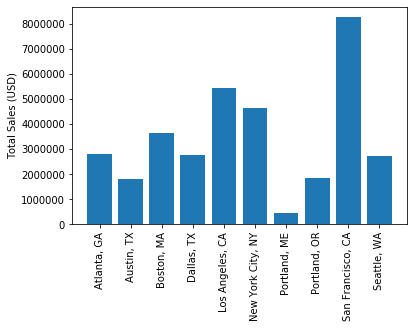

In [290]:

# city = all_data['city'].unique() This code will give the cities in the wrong order as of sales

city = [city for city, df in all_data.groupby(['city'])]

plt.bar(city, best_city['Total'])
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=90)
plt.show()

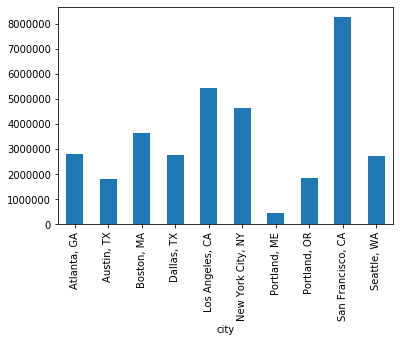

In [291]:
best_city['Total'].plot.bar()

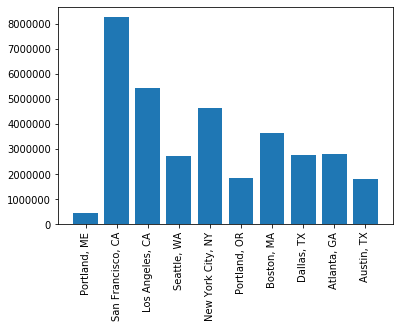

In [293]:
test_city = all_data.city.unique()
test_best_city = all_data.groupby(['city'], sort=False).sum()

plt.bar(test_city, test_best_city['Total'])
plt.xticks(rotation=90)
plt.show()

#### Q3: What time should we display advertisements to maximize the likelihood of purchases? ####

In [299]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,city
0,209921,USB-C Charging Cable,1.000,11.950,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.950,"Portland, ME"
1,209922,Macbook Pro Laptop,1.000,1700.000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.000,"San Francisco, CA"
2,209923,ThinkPad Laptop,1.000,999.990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.990,"Los Angeles, CA"
3,209924,27in FHD Monitor,1.000,149.990,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.990,"Seattle, WA"
4,209925,Bose SoundSport Headphones,1.000,99.990,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.990,"San Francisco, CA"


In [302]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [303]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,city,Hour,Minute
0,209921,USB-C Charging Cable,1.000,11.950,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.950,"Portland, ME",19,34
1,209922,Macbook Pro Laptop,1.000,1700.000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.000,"San Francisco, CA",10,5
2,209923,ThinkPad Laptop,1.000,999.990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.990,"Los Angeles, CA",20,18
3,209924,27in FHD Monitor,1.000,149.990,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.990,"Seattle, WA",10,21
4,209925,Bose SoundSport Headphones,1.000,99.990,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.990,"San Francisco, CA",18,58


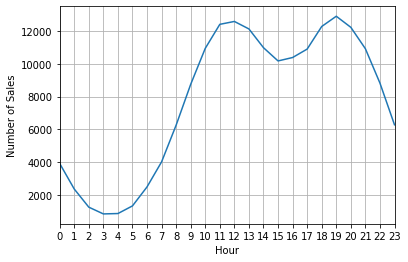

In [319]:
test = all_data.groupby(['Hour']).count()
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
test['Order ID'].plot(kind='line', grid=True, xticks=all_data['Hour'].unique())

# Best to advertise around 12PM or 7PM

### Q4: What products are most often sold together? ###

In [354]:
all_data2 = all_data.copy()

In [355]:
merged = pd.merge(left=all_data, right=all_data2, left_on='Order ID', right_on='Order ID')

In [356]:
merged.head()

,Order ID,Product_x,Quantity Ordered_x,Price Each_x,Order Date_x,Purchase Address_x,Month_x,Total_x,city_x,Hour_x,...,Product_y,Quantity Ordered_y,Price Each_y,Order Date_y,Purchase Address_y,Month_y,Total_y,city_y,Hour_y,Minute_y
0,209921,USB-C Charging Cable,1.000,11.950,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.950,"Portland, ME",19,...,USB-C Charging Cable,1.000,11.950,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.950,"Portland, ME",19,34
1,209922,Macbook Pro Laptop,1.000,1700.000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.000,"San Francisco, CA",10,...,Macbook Pro Laptop,1.000,1700.000,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.000,"San Francisco, CA",10,5
2,209923,ThinkPad Laptop,1.000,999.990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.990,"Los Angeles, CA",20,...,ThinkPad Laptop,1.000,999.990,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.990,"Los Angeles, CA",20,18
3,209924,27in FHD Monitor,1.000,149.990,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.990,"Seattle, WA",10,...,27in FHD Monitor,1.000,149.990,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.990,"Seattle, WA",10,21
4,209925,Bose SoundSport Headphones,1.000,99.990,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.990,"San Francisco, CA",18,...,Bose SoundSport Headphones,1.000,99.990,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.990,"San Francisco, CA",18,58


In [422]:
product = merged[['Order ID','Product_x', 'Product_y']]

rows_to_drop = product[product['Product_x'] == product['Product_y']]
product.drop(rows_to_drop.index, inplace=True)

product = product.reset_index()
product.drop('index', axis=1, inplace=True)

/Users/chameleon_7/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [428]:
test= product.groupby(['Product_x', 'Product_y']).count().reset_index()
sorted = test.sort_values('Order ID', ascending=False)
sorted['Order ID'].drop_duplicates(inplace=True)
sorted.head()

# iPhone and Lightning Charging Cable are bought most often at 1015 times 

,Product_x,Product_y,Order ID
312,iPhone,Lightning Charging Cable,1015
217,Lightning Charging Cable,iPhone,1015
260,USB-C Charging Cable,Google Phone,999
171,Google Phone,USB-C Charging Cable,999
317,iPhone,Wired Headphones,462


In [380]:
all_data3=all_data.copy()

In [425]:
test=all_data3[all_data3['Order ID'].duplicated(keep=False)]
test['grouped'] = all_data3.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
test=test[['Order ID', 'grouped']].drop_duplicates()
test.head()

,Order ID,grouped
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"


In [426]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in test['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


### Q5: What product sold the most? Why do you think it did? ###

Text(0, 0.5, 'Average Price')

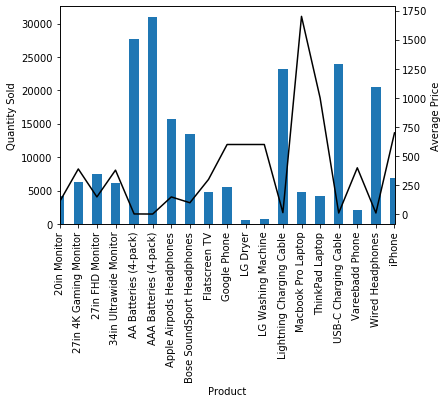

In [479]:
product_count = all_data.groupby(['Product'])['Quantity Ordered'].sum().plot.bar()
price = all_data.groupby(['Product']).mean()['Price Each'].plot(secondary_y=True, color='k', rot=90)
product_count.set_ylabel('Quantity Sold')
price.set_ylabel('Average Price')

In [1]:
# Looks like AAA batteries are sold the most because the unit price is relatively low. 
# Also it looks like the unit price and amount of that item sold are inversely proportional.
# This relationship holds true for most of the stuff except when it comes to Apple laptops
# and that is probably because the students are buying it or tech companies are buying it. 